In [3]:
print("hello")

hello


import numpy as np

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

pricing = pd.read_csv('C:/Users/danie/Downloads/housing_price_dataset.csv')
pricing

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


In [5]:
pricing = pricing.truncate(1, 500)

In [6]:
pricing = pricing[["SquareFeet", "YearBuilt", "Price"]]
pricing

,SquareFeet,YearBuilt,Price
1,2459,1980,195014.221626
2,1860,1970,306891.012076
3,2294,1996,206786.787153
4,2130,2001,272436.239065
5,2095,2020,198208.803907
...,...,...,...
496,1127,1965,127174.722595
497,1017,1996,127458.039009
498,2816,1974,356063.829221
499,2758,2006,344787.619393


In [7]:
pricing.corr()["Price"]

SquareFeet    0.734485
YearBuilt     0.000261
Price         1.000000
Name: Price, dtype: float64

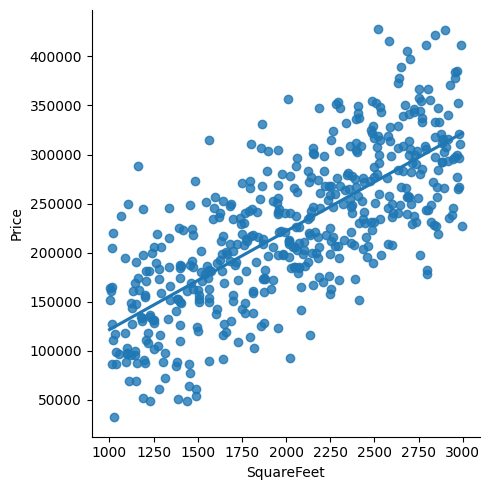

In [8]:
sns.lmplot(x="SquareFeet", y = "Price", data = pricing, fit_reg=True, ci=None)

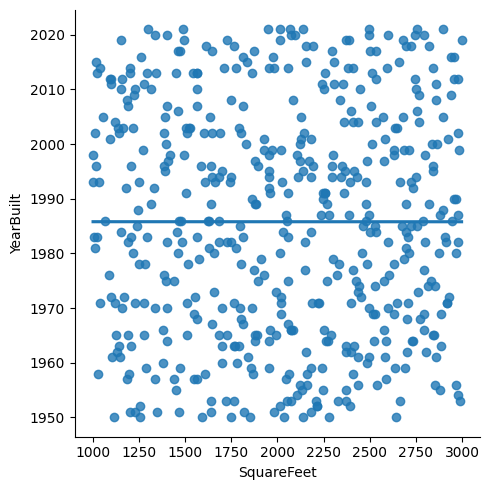

In [9]:
sns.lmplot(x="SquareFeet", y = "YearBuilt", data = pricing, fit_reg = True, ci = None)

<Axes: ylabel='Frequency'>

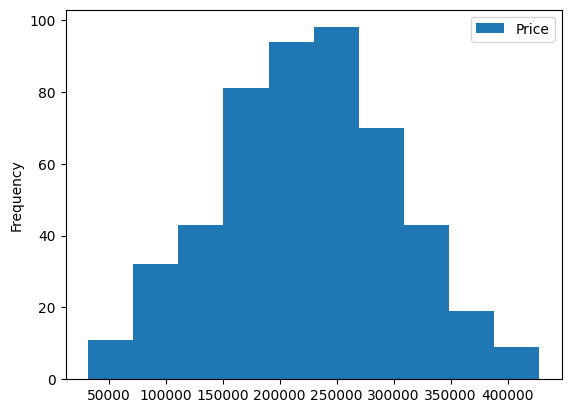

In [10]:
pricing.plot.hist(y="Price")

In [11]:
#This line checks missing values in the code
#since the selected rows in this dataset have none, the table is empty
# you would use pricing = pricing.dropna() if there were any
pricing[pricing.isnull().any(axis=1)]

,SquareFeet,YearBuilt,Price


In [12]:
train  = pricing[pricing["YearBuilt"] < 2010].copy()
test = pricing[pricing["YearBuilt"] >= 2010].copy()

In [13]:
train.shape

(409, 3)

In [14]:
test.shape 

(91, 3)

In [15]:
reg = LinearRegression()

In [16]:
#Determine what variables you want to predict your target
predictors=["SquareFeet"]
target = ["Price"]

In [17]:
#The fit method trains using the predictors 
# We pass in the target as well
#This trains the model to hit the target
reg.fit(train[predictors], train[target])

LinearRegression()

In [18]:
#We use the fit method now generate predictions on new data
#This enables the model to hit the target given new data
predictions = reg.predict(test[predictors])
predictions

array([[232807.10663691],
       [157062.98551733],
       [275111.00407072],
       [218705.80749231],
       [124629.99748475],
       [273499.42702562],
       [220720.27879868],
       [179121.4463221 ],
       [238749.79699071],
       [308047.60992989],
       [253153.26683126],
       [200676.28930028],
       [131680.64705705],
       [262520.55840589],
       [319429.37281089],
       [313385.95889178],
       [195942.28173031],
       [204604.50834771],
       [296262.95278762],
       [298579.59478995],
       [172070.7967498 ],
       [126543.7452258 ],
       [142659.51567678],
       [298881.7654859 ],
       [132385.71201428],
       [184157.62458803],
       [303011.43166396],
       [247512.74717342],
       [199669.0536471 ],
       [283471.05999216],
       [179222.16988742],
       [291528.94521765],
       [176905.5278851 ],
       [305730.96792757],
       [321544.56768258],
       [224447.05071547],
       [187481.50224355],
       [258894.51005442],
       [2540

In [19]:
#We want to round our numbers to two decimal places
test["predictions"] = predictions
test

,SquareFeet,YearBuilt,Price,predictions
5,2095,2020,198208.803907,232807.106637
23,1343,2013,151733.922490,157062.985517
24,2515,2013,307961.107382,275111.004071
29,1955,2014,240976.551767,218705.807492
34,1021,2013,110408.670801,124629.997485
...,...,...,...,...
472,2069,2021,179619.681059,230188.293939
475,1098,2011,96810.155438,132385.712014
479,1279,2011,60826.530088,150616.677337
482,1301,2021,88586.057298,152832.595774


In [20]:
#Check if there are any values less than 0 
#Houses cannot sell for negative money (at least not in this model haha)
negative = (pricing <0).all(axis=1)
print(negative)

1      False
2      False
3      False
4      False
5      False
       ...  
496    False
497    False
498    False
499    False
500    False
Length: 500, dtype: bool


In [21]:
#See previous notes; this also locates any values less than 0
test.loc[test["predictions"] < 0, "predictions"] = 0

In [22]:
#This rounds up the numbers in the predictions column
test["predictions"] = test["predictions"].round(2)
test

,SquareFeet,YearBuilt,Price,predictions
5,2095,2020,198208.803907,232807.11
23,1343,2013,151733.922490,157062.99
24,2515,2013,307961.107382,275111.00
29,1955,2014,240976.551767,218705.81
34,1021,2013,110408.670801,124630.00
...,...,...,...,...
472,2069,2021,179619.681059,230188.29
475,1098,2011,96810.155438,132385.71
479,1279,2011,60826.530088,150616.68
482,1301,2021,88586.057298,152832.60


In [23]:
# x_train is the input variable (size in 1000s of sq ft)
# y_train is the output variable (price in 1000s of $$)
x_train = np.array([1.0, 2.0])
y_train = np.array([100, 300])

In [24]:
# m is the number of training examples: we use len to get that number
m = len(x_train)

In [25]:
i = 0 #i'th training example

x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i})), y^({i}) = ({x_i}, {y_i})")

(x^(0)), y^(0) = (1.0, 100)


Text(0.5, 0, 'Size (in sq ft)')

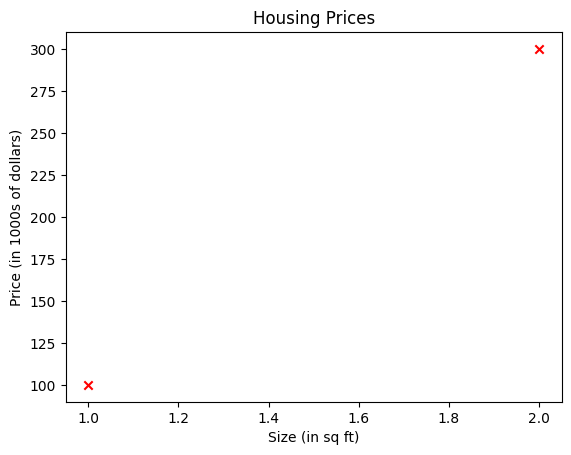

In [26]:
#plot the data points
plt.scatter(x_train, y_train, marker = 'x', c = 'r')

#set the title
plt.title("Housing Prices")

#set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')

#set the x-axis label
plt.xlabel('Size (in sq ft)')

In [27]:
w = 100
b = 100
print (f"w: {w}")
print(f"b: {b}")

w: 100
b: 100


In [28]:
def calculate_model_output (w, b, x):
    m = x.shape
    f_wb = np.zeros(m)

    for i in range(len(x)):
        f_wb[i] = w* x[i] + b
        
    return f_wb 

<function matplotlib.pyplot.show(close=None, block=None)>

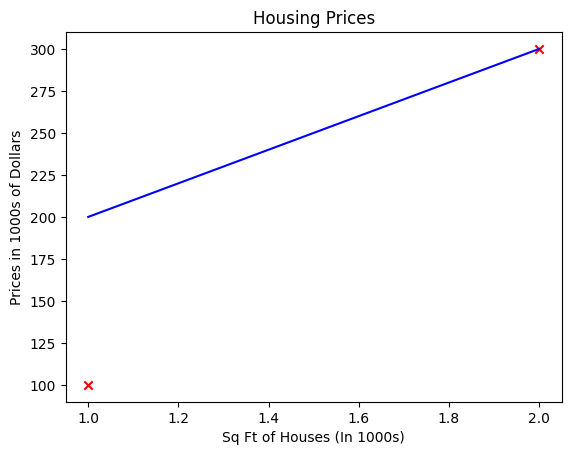

In [29]:
temp_f_wb = calculate_model_output(w, b, x_train)

#Plot model predictions
plt.plot(x_train, temp_f_wb, c = 'b', label="Our Prediction")

#Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r', label="Actual Values")

#Set the title
plt.title("Housing Prices")
#Set the y-axis label 
plt.ylabel("Prices in 1000s of Dollars")
#Set the x-axis label
plt.xlabel("Sq Ft of Houses (In 1000s)")
plt.legend
plt.show



In [30]:
w = 200
b = 100
cost_1200sqft = w * 1.200 + b

print(f"The price is ${cost_1200sqft} thousand dollars")


The price is $340.0 thousand dollars
